In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

vvdm = np.load("/home/douglas/vvdm.001.npy")
vvdisk = np.load("/home/douglas/vvdisk.001.npy")
vvbulge = np.load("/home/douglas/vvbulge.001.npy")
ppdm = np.load("/home/douglas/ppdm.001.npy")
ppdisk = np.load("/home/douglas/ppdisk.001.npy")
ppbulge = np.load("/home/douglas/ppbulge.001.npy")

(-20000, 20000)

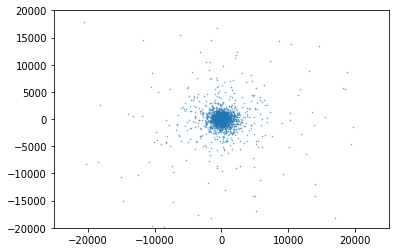

In [8]:
plt.scatter(ppbulge[:,0],ppbulge[:,1], s=0.5,alpha=0.5)
plt.xlim(-25000,25000)
plt.ylim(-20000,20000)

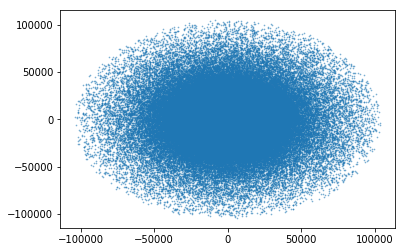

In [9]:
plt.scatter(ppdm[:,0],ppdm[:,1], s=0.5,alpha=0.5)

In [1]:
import agama

In [16]:
bulgemass = np.full((1000000),9.8628186e3)
diskmass = np.full((5000000),1.1880213e4)   #Solar masses
dmass = np.full((39999999), 2.6287773e4)

In [19]:
agama.setUnits(mass=1, length=1, velocity=1)

dark = agama.Potential(type = "Multipole",particles=(ppdm, dmass),symmetry='a', gridsizeR=20, lmax=2)

disk = agama.Potential(type = "CylSpline",particles=(ppdisk, diskmass),gridsizer=20, gridsizez=20,
                        mmax=0, Rmin=20, symmetry='a',Rmax=10000, Zmin=20, Zmax=10000)
                       
bulge = agama.Potential(type = "CylSpline",particles=(ppbulge, bulgemass),gridsizer=20, gridsizez=20,
                        mmax=0, Rmin=20, symmetry='a',Rmax=10000, Zmin=20, Zmax=10000)

In [25]:
potential = agama.Potential(dark, disk, bulge)
af = agama.ActionFinder(potential, interp=False)

In [28]:
bulgepoints = np.hstack((ppbulge,vvbulge))
diskpoints = np.hstack((ppdisk,vvdisk))
dmpoints = np.hstack((ppdm,vvdm))

points = np.vstack((bulgepoints,diskpoints,dmpoints))
print(points.shape)

(45999999, 6)


In [31]:
actions, angles, freq = af(points, angles=True)

#actions in units of (M_sun * pc * km/s)

In [33]:
print(actions.shape)

(45999999, 3)


In [34]:
Jrdisk = actions[1000001:6000001, 0]
Jzdisk = actions[1000001:6000001, 1]
Jphidisk = actions[1000001:6000001, 2]

Jrbulg = actions[:1000001, 0]
Jzbulg = actions[:1000001, 1]
Jphibulg = actions[:1000001, 2]

Jrdm = actions[6000001:45999999, 0]
Jzdm = actions[6000001:45999999, 1]
Jphidm = actions[6000001:45999999, 2]

Text(0.5,1,'Disk')

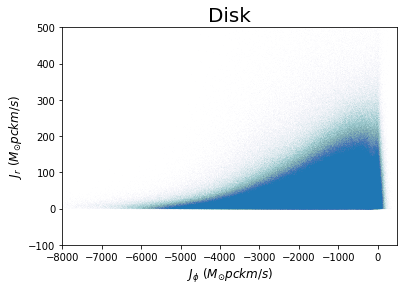

In [56]:
plt.scatter(Jphidisk, Jrdisk, s=0.03, alpha=0.02)
plt.ylim(-100,500)
plt.xlim(-8000,500)
plt.xlabel("$J_{\phi}\ (M_{\odot} pc km/s)$", fontsize=12)
plt.ylabel("$J_r\ (M_{\odot} pc km/s)$", fontsize=12)
plt.title("Disk", fontsize=20)

Text(0.5,1,'Bulge')

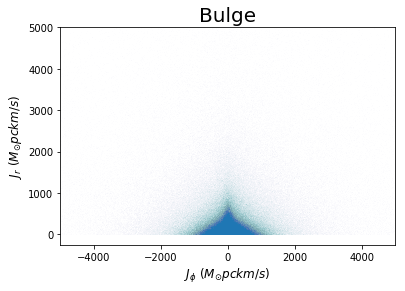

In [57]:
plt.scatter(Jphibulg, Jrbulg, s=0.03, alpha=0.02)
plt.ylim(-250,5000)
plt.xlim(-5000,5000)
plt.xlabel("$J_{\phi}\ (M_{\odot} pc km/s)$", fontsize=12)
plt.ylabel("$J_r\ (M_{\odot} pc km/s)$", fontsize=12)
plt.title("Bulge", fontsize=20)

Text(0.5,1,'Dark Matter Halo')

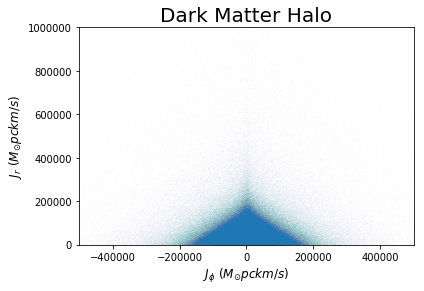

In [58]:
plt.scatter(Jphidm, Jrdm, s=0.03, alpha=0.02)
plt.ylim(-1000,1000000)
plt.xlim(-500000,500000)
plt.xlabel("$J_{\phi}\ (M_{\odot} pc km/s)$", fontsize=12)
plt.ylabel("$J_r\ (M_{\odot} pc km/s)$", fontsize=12)
plt.title('Dark Matter Halo', fontsize=20)

In [48]:
Trdisk = angles[1000001:6000001, 0]
Tzdisk = angles[1000001:6000001, 1]
Tphidisk = angles[1000001:6000001, 2]

Trbulg = angles[:1000001, 0]
Tzbulg = angles[:1000001, 1]
Tphibulg = angles[:1000001, 2]

Trdm = angles[6000001:45999999, 0]
Tzdm = angles[6000001:45999999, 1]
Tphidm = angles[6000001:45999999, 2]

Text(0.5,1,'Disk')

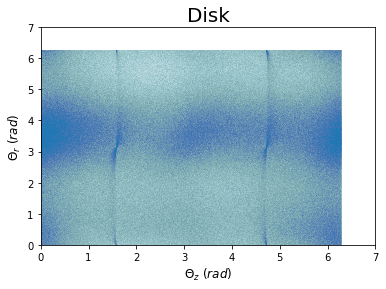

In [59]:
plt.scatter(Tzdisk, Trdisk, s=0.03, alpha=0.02)
plt.xlim(0,7)
plt.ylim(0,7)
plt.xlabel("$\Theta_z\ (rad)$", fontsize=12)
plt.ylabel("$\Theta_r\ (rad)$", fontsize=12)
plt.title("Disk", fontsize=20)

Text(0.5,1,'Bulge')

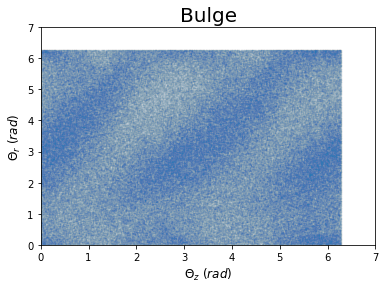

In [60]:
plt.scatter(Tzbulg, Trbulg, s=0.05, alpha=0.05)
plt.xlim(0,7)
plt.ylim(0,7)
plt.xlabel("$\Theta_z\ (rad)$", fontsize=12)
plt.ylabel("$\Theta_r\ (rad)$", fontsize=12)
plt.title("Bulge", fontsize=20)

Text(0.5,1,'Dark Matter Halo')

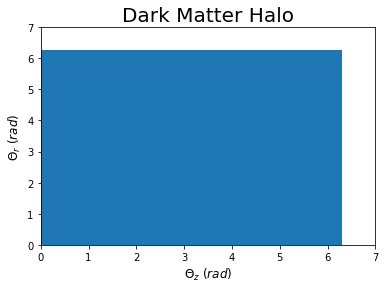

In [62]:
plt.scatter(Tzdm, Trdm, s=0.01, alpha=0.01)
plt.xlim(0,7)
plt.ylim(0,7)
plt.xlabel("$\Theta_z\ (rad)$", fontsize=12)
plt.ylabel("$\Theta_r\ (rad)$", fontsize=12)
plt.title('Dark Matter Halo', fontsize=20)